# Preliminary EDA for AMES Iowa Housing Data

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Data Dictionary For Housing Data

In [97]:
def get_unique_values(df):
    for i in df.columns:
        print(i,set(np.unique(df[i])),'\n')
        
def type_(x):
    if len(x) == 0:
        t = 'Numerical'
    elif len(x) == 2:
        t = 'Binary Categorical'
    else:
        t = 'Categorical' 
    return t

In [445]:
housing_dict = pd.read_csv('./data/data_description.txt',
                   sep="\n|:",
                   header=None,
                   engine='python')

housing_dict.columns = ['var','descr']

new_housing_dict = housing_dict.loc[~housing_dict['descr'].isnull()]

new_housing_dict.loc[0:,'index_'] = new_housing_dict.index

idx = new_housing_dict['index_'].to_numpy()
i = 0
indx_outcomes = []
while (i < len(idx)-1):
    indx_outcomes.append(np.arange(idx[i]+1,idx[i+1]))
    i += 1

associated_outcomes = []
for j in indx_outcomes:
    associated_outcomes.append(housing_dict[['var']].loc[j].to_numpy())
    
associated_outcomes.append(np.array([])) #append an empty array to fix length issue

associated_outcomes = pd.Series(associated_outcomes).\
                        apply(lambda outcome_set: [i[0] for i in outcome_set]).to_numpy()



new_housing_dict.loc[0:,'associated_outcomes'] = associated_outcomes
new_housing_dict = new_housing_dict.reset_index()
new_housing_dict = new_housing_dict.drop(['index','index_'], axis = 1)


types = [type_(elem) for elem in new_housing_dict['associated_outcomes']]
new_housing_dict.loc[0:,'Variable Type'] = types

housing_dict = new_housing_dict

def ghd():
    return(housing_dict.sort_values(by = "var"))

# Reading in Housing Data

In [99]:
housing = pd.read_csv('./data/Ames_Housing_Price_Data.csv')
housing.rename(columns = {'PID':'MapRefNo'}, inplace = True) # renaming to later merge res and housing on this column
housing = housing.drop('Unnamed: 0', axis = 1)
housing.shape

(2580, 81)

In [100]:
housing.head()

MapRefNo  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
0  909176150        856     126000          30       RL          NaN     7890   
1  905476230       1049     139500         120       RL         42.0     4235   
2  911128020       1001     124900          30  C (all)         60.0     6060   
3  535377150       1039     114000          70       RL         80.0     8146   
4  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
1   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
4   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0        SWISU       Norm       Norm     1Fam     1Story            6   
1      Edwards       Norm       Norm   TwnhsE     1Story            5   
2       IDOTRR       Norm       Norm     1Fam     1Story            5   
3      OldTown       Norm       Norm     1Fam     2Story            4   
4       NWAmes       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            6       1939          1950     Gable  CompShg     Wd Sdng   
1            5       1984          1984     Gable  CompShg     HdBoard   
2            9       1930          2007       Hip  CompShg     MetalSd   
3            8       1900          2003     Gable  CompShg     MetalSd   
4            6       2001          2001     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     Wd Sdng       None         0.0        TA        TA     CBlock       TA   
1     HdBoard    BrkFace       149.0        Gd        TA     CBlock       Gd   
2     MetalSd       None         0.0        Gd        TA     BrkTil       TA   
3     MetalSd       None         0.0        Gd        Gd     BrkTil       Fa   
4     VinylSd       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          Rec       238.0          Unf         0.0   
1       TA           Mn          GLQ       552.0          ALQ       393.0   
2       TA           No          ALQ       737.0          Unf         0.0   
3       TA           No          Unf         0.0          Unf         0.0   
4       TA           No          GLQ       643.0          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0      618.0        856.0    GasA        TA          Y      SBrkr       856   
1      104.0       1049.0    GasA        TA          Y      SBrkr      1049   
2      100.0        837.0    GasA        Ex          Y      SBrkr      1001   
3      405.0        405.0    GasA        Gd          Y      SBrkr       717   
4      167.0        810.0    GasA        Ex          Y      SBrkr       810   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0         0             0           1.0           0.0         1         0   
1         0             0           1.0           0.0         2         0   
2         0             0           0.0           0.0         1         0   
3       322             0           0.0           0.0         1         0   
4       855             0           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             4        Typ   
1             2             1          Gd             5        Typ   
2             2             1          Gd             5        Typ   
3             2             1          TA             6 

# Looking Into Square Footage Variables:

We consider 2 groups:

 - Within House:

1stFlrSF,2ndFlrSF,BsmntFinSF1,BsmntFinSF2,BsmtUnfSF,GrLivArea,LowQualFinSF,TotalBsmtSF

 - Auxillary:
 
3SsnPorch,EnclosedPorch,GarageArea,LotArea,MasVnrArea,OpenPorchSF,PoolArea,ScreenPorch,WoodDeckSF


**Some Within House Square Footage Feature Engineering:**

In [101]:
whsf_cols = ['SalePrice','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GrLivArea','LowQualFinSF','TotalBsmtSF']
whsf = ghd().set_index('var').loc[whsf_cols,:] #within house sf

################################################################################# Total Square Footage Including Basement Within House

housing.loc[0:,'TotalSF'] = housing['GrLivArea'] + housing['TotalBsmtSF']
whsf_cols.append('TotalSF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Price per Square Foot Within House

housing.loc[0:,'Price/SF'] = housing['SalePrice']/housing['TotalSF']
whsf_cols.append('Price/SF')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of Basement Unfinished


housing.loc[0:,'BsmtPercentUnfinished'] = housing['BsmtUnfSF']/housing['TotalBsmtSF']
whsf_cols.append('BsmtPercentUnfinished')
whsf = ghd().set_index('var').loc[whsf_cols,:]

################################################################################# Percentage of total within house sf that's finished & low quality


housing.loc[0:,'LowQualFinishedPercent'] = housing['LowQualFinSF']/(housing['TotalSF'])
whsf_cols.append('LowQualFinishedPercent')
whsf = ghd().set_index('var').loc[whsf_cols,:]

In [102]:
housing[whsf.index].head()

SalePrice  1stFlrSF  2ndFlrSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0     126000       856         0       238.0         0.0      618.0   
1     139500      1049         0       552.0       393.0      104.0   
2     124900      1001         0       737.0         0.0      100.0   
3     114000       717       322         0.0         0.0      405.0   
4     227000       810       855       643.0         0.0      167.0   

   GrLivArea  LowQualFinSF  TotalBsmtSF  TotalSF   Price/SF  \
0        856             0        856.0   1712.0  73.598131   
1       1049             0       1049.0   2098.0  66.491897   
2       1001             0        837.0   1838.0  67.954298   
3       1039             0        405.0   1444.0  78.947368   
4       1665             0        810.0   2475.0  91.717172   

   BsmtPercentUnfinished  LowQualFinishedPercent  
0               0.721963                     0.0  
1               0.099142                     0.0  
2               0.119474                     0.0  
3               1.000000                     0.0  
4               0.206173                     0.0

**Some Auxillary Square Footage Feature Engineering:**

In [514]:
auxsf_cols = ['SalePrice','3SsnPorch','EnclosedPorch','GarageArea','LotArea','OpenPorchSF','PoolArea','ScreenPorch','WoodDeckSF']
auxsf = ghd().set_index('var').loc[auxsf_cols,:] #auxillary house sf
#auxsf

################################################################################# Auxillary Total Square Footage

housing.loc[0:,'TotalAuxSF'] = [np.sum(housing[auxsf.index[1:-1]].iloc[i,:]) for i in range(0,len(housing))]
auxsf_cols.append('TotalAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# difference from mean total aux sf

housing.loc[0:,'relativeAuxSF'] =  housing['TotalAuxSF'] - np.mean(housing['TotalAuxSF'])
auxsf_cols.append('relativeAuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

################################################################################# Price per auxillary SF
housing.loc[0:,'Price/AuxSF'] =  housing['SalePrice']/housing['TotalAuxSF']
auxsf_cols.append('Price/AuxSF')
auxsf = ghd().set_index('var').loc[auxsf_cols,:]

In [515]:
housing[auxsf.index].head()

SalePrice  3SsnPorch  EnclosedPorch  GarageArea  LotArea  OpenPorchSF  \
0     126000          0              0       399.0     7890            0   
1     139500          0              0       266.0     4235          105   
2     124900         86             42       216.0     6060            0   
3     114000          0            168       281.0     8146            0   
4     227000          0              0       528.0     8400           45   

   PoolArea  ScreenPorch  WoodDeckSF  TotalAuxSF  relativeAuxSF  Price/AuxSF  
0         0          166           0      8455.0   -2221.488372    14.902425  
1         0            0           0      4606.0   -6070.488372    30.286583  
2         0            0         154      6404.0   -4272.488372    19.503435  
3         0          111           0      8706.0   -1970.488372    13.094418  
4         0            0           0      8973.0   -1703.488372    25.298117

### Data Dictionary for Real Estate Data

In [107]:
res = pd.read_csv('./data/Ames_Real_Estate_Data.csv')
res.shape

dd_res = pd.read_excel('./data/Tbl_DataExportSpec.xls')
dd_res.shape

(100, 7)

## **Note: res columns (36,40,81,87) have mixed data types**

In [108]:
#res.iloc[:,[36,40,81,87]]

### Data Dictionary for Housing Data

# Merging housing and real estate datasets

In [109]:
#dd_res.sort_values(by ='Field Name').head()

In [110]:
Kres = ['MapRefNo','SchD_S','TxD_S','Rcrd_Yr','Rcrd_Mo','LndAc_S','ImpAc_S', #res variables to potentially keep
        'OthAc_S','TtlVal_AsrYr','ValType','TxNet','TxGross',
        'AcreGr','AcreNt_S','LotArea','YrBuilt','HouseStyle',
        'Foundation','RoofMatl','Ext1','Ext2','MasVnrType',
       'Heating','Central Air','GLA','TtlBsmtSF',
       'TotRmsAbvGrd','Fireplaces','PoolArea','GarageType',
       'GarYrBlt','Cars','SalePrice','SaleType',
       'SaleCond','PA-Nmbr','PA-PreD','PA-Strt','PA-StSfx',
       'PA-PostD','PA-UnTyp','PA-UntNo','Date','Source','NmbrBRs']

idx = [list(res.columns).index(i) for i in Kres if i in res.columns]

res_truncated = res.iloc[:,idx]

hres = pd.merge(housing,res_truncated,how = 'inner', on = 'MapRefNo')

#### Some variable names are duplicated in the real estate dataset:

y = hres.columns.str.contains(pat = '._y')
dup_idy = [i  for i,j in enumerate(y) if j == True]
d = hres[hres.columns[[tuple(dup_idy)]]].columns.to_numpy()

for i in range(0,len(d)):
    d[i] = d[i].strip('_y')
    
Kres = list(set(Kres) - set(d))
idx = [list(res.columns).index(i) for i in Kres if i in res.columns]
res_truncated = res.iloc[:,idx]
hres = pd.merge(housing,res_truncated,how = 'inner', on = 'MapRefNo')

**Real estate data is from recent years (2017-2020),
Housing data is from 2006-2010**

# Investigating Merged Dataset

In [111]:
hres.columns

Index(['MapRefNo', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       ...
       'NmbrBRs', 'PA-UntNo', 'Cars', 'PA-Strt', 'PA-UnTyp', 'TtlVal_AsrYr',
       'Rcrd_Yr', 'ImpAc_S', 'Date', 'Central Air'],
      dtype='object', length=118)

In [112]:
#dd_res.sort_values(by = 'Field Name')

In [113]:
#hres[['MapRefNo','Date','LndAc_S','YrBuilt']]

Functions to filter correlation heatmaps:

In [511]:
import copy

def corr_filter(df,thresh,less_or_eq):
    
    if (less_or_eq == True):
        j = copy.deepcopy(df)
        for i in df.columns.to_numpy():
            j[i] = np.where(np.abs(j[i]) <= thresh,'',j[i])
        
        return j
    
    elif(less_or_eq == False):
        j = copy.deepcopy(df)
        for i in df.columns.to_numpy():
            j[i] = np.where(np.abs(j[i]) > thresh,'',j[i])
        
        return j

def filtered_Heat(df,t,h,w,a,dir_):
    
    if dir_ == True:
        
        sign = '>'
        
    else:
        
        sign = '<='
        
    M = corr_filter(df,thresh = t,less_or_eq = dir_)
    fig = px.imshow(M,width = w, height = w,aspect = a,
                color_continuous_scale = 'blues',
                title = f'Filtered Heatmap: |Corr| {sign} {t}')
    fig.show()

In [512]:
hcorr = pd.DataFrame(housing.corr())
hrescorr = pd.DataFrame(hres.corr())
hrescorr_nonull = hrescorr.dropna(axis = 0,how = 'all').dropna(axis = 1,how = 'all')

In [513]:
filtered_Heat(hrescorr_nonull,0,h=800,w=800,a=1,dir_ = True) #merged dataset heatmap

In [494]:
fig = px.imshow(hcorr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Housing Dataset')
fig.show()

In [493]:
fig = px.imshow(hrescorr_nonull[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Sale Price Heatmap Merged Dataset')
fig.show()

In [495]:
fig = px.imshow(hrescorr_nonull[['Price/SF']].sort_values(by = 'Price/SF', ascending = False).T,
                width = 1100, height = 500, aspect = 1,
                color_continuous_scale = 'Turbo',
                title = 'Price/SF Heatmap Merged Dataset')
fig.show()

### Correlation Lists

In [482]:
hsale_cors =  hcorr[['SalePrice']].sort_values(by = 'SalePrice', ascending = False) # sorted correlations with SalePrice from Housing dataset
sale_cors = hrescorr_nonull[['SalePrice']].sort_values(by = 'SalePrice', ascending = False) # sorted correlations with SalePrice from merged dataset
price_rate_cors = hrescorr_nonull[['Price/SF']].sort_values(by = 'Price/SF', ascending = False) # sorted correlations with Price/SF from merged dataset

# Trends against Sale Price (Hued by Overall Quality)

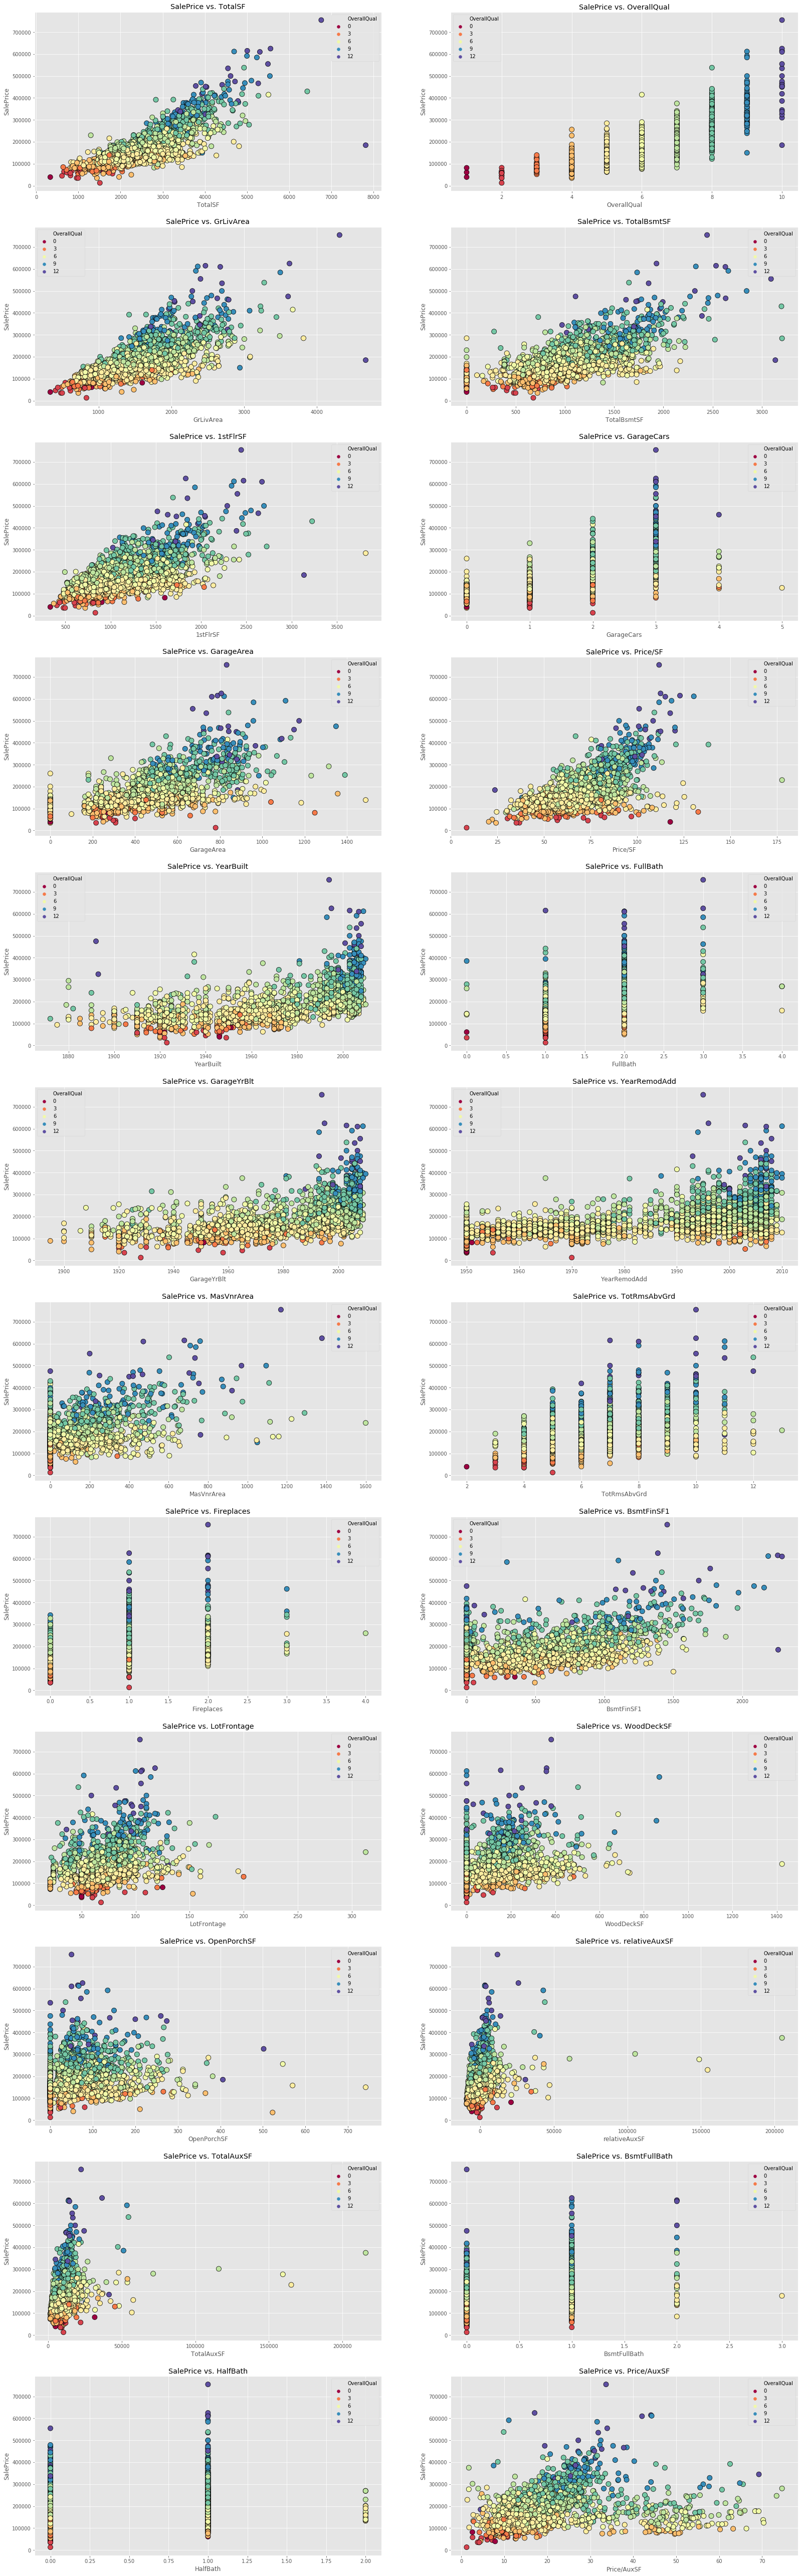

In [666]:
fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(hsale_cors.index[1:25])):
    sns.scatterplot(y='SalePrice', x=col, s = 100,ax=axs[i],hue = 'OverallQual',palette="Spectral",edgecolor = 'black',data=housing)
    axs[i].set_ylabel('SalePrice')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'SalePrice vs. {col}')
plt.show()

## *The following have bunches at 0, likely because they are conditional on existing in the first place:*

#### TotalBsmntSF -> Conditional on having a basement

#### GarageArea -> Conditional on having a garage

#### YearRemodAdd -> Conditional on having a remodeling instance

#### MasVnrArea -> Conditional having Masonry Veneer

#### BsmntFinSF1 -> Conditional on having a basement

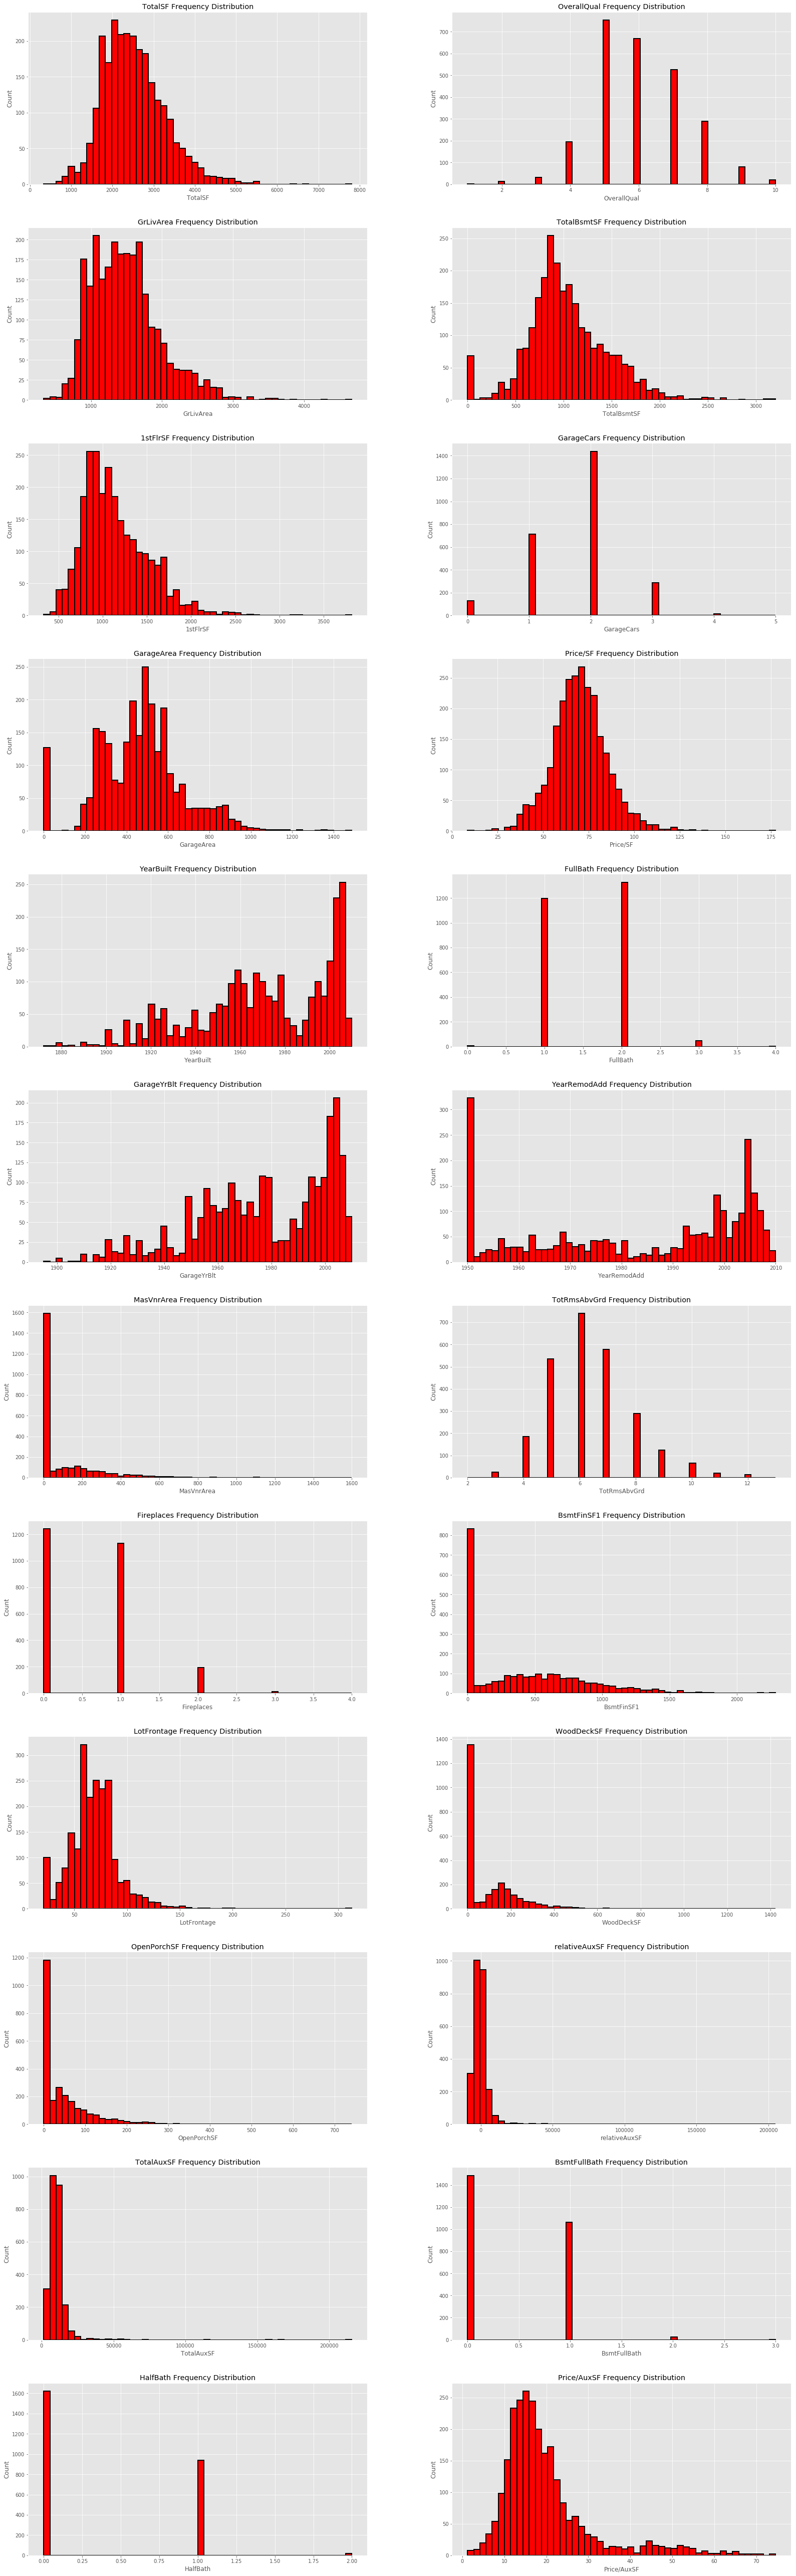

In [667]:
fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3,wspace = .25,hspace = .25)
axs = axs.flatten()
for i, col in enumerate(list(hsale_cors.index[1:25])):
    axs[i].hist(x=col,data=housing,edgecolor = 'black',color = 'red',linewidth = 2, bins = 50)
    axs[i].set_ylabel('Count')
    axs[i].set_xlabel(col)
    axs[i].set_title(f'{col} Frequency Distribution')

## Trends against Overall Quality (Hued by Sale Price)

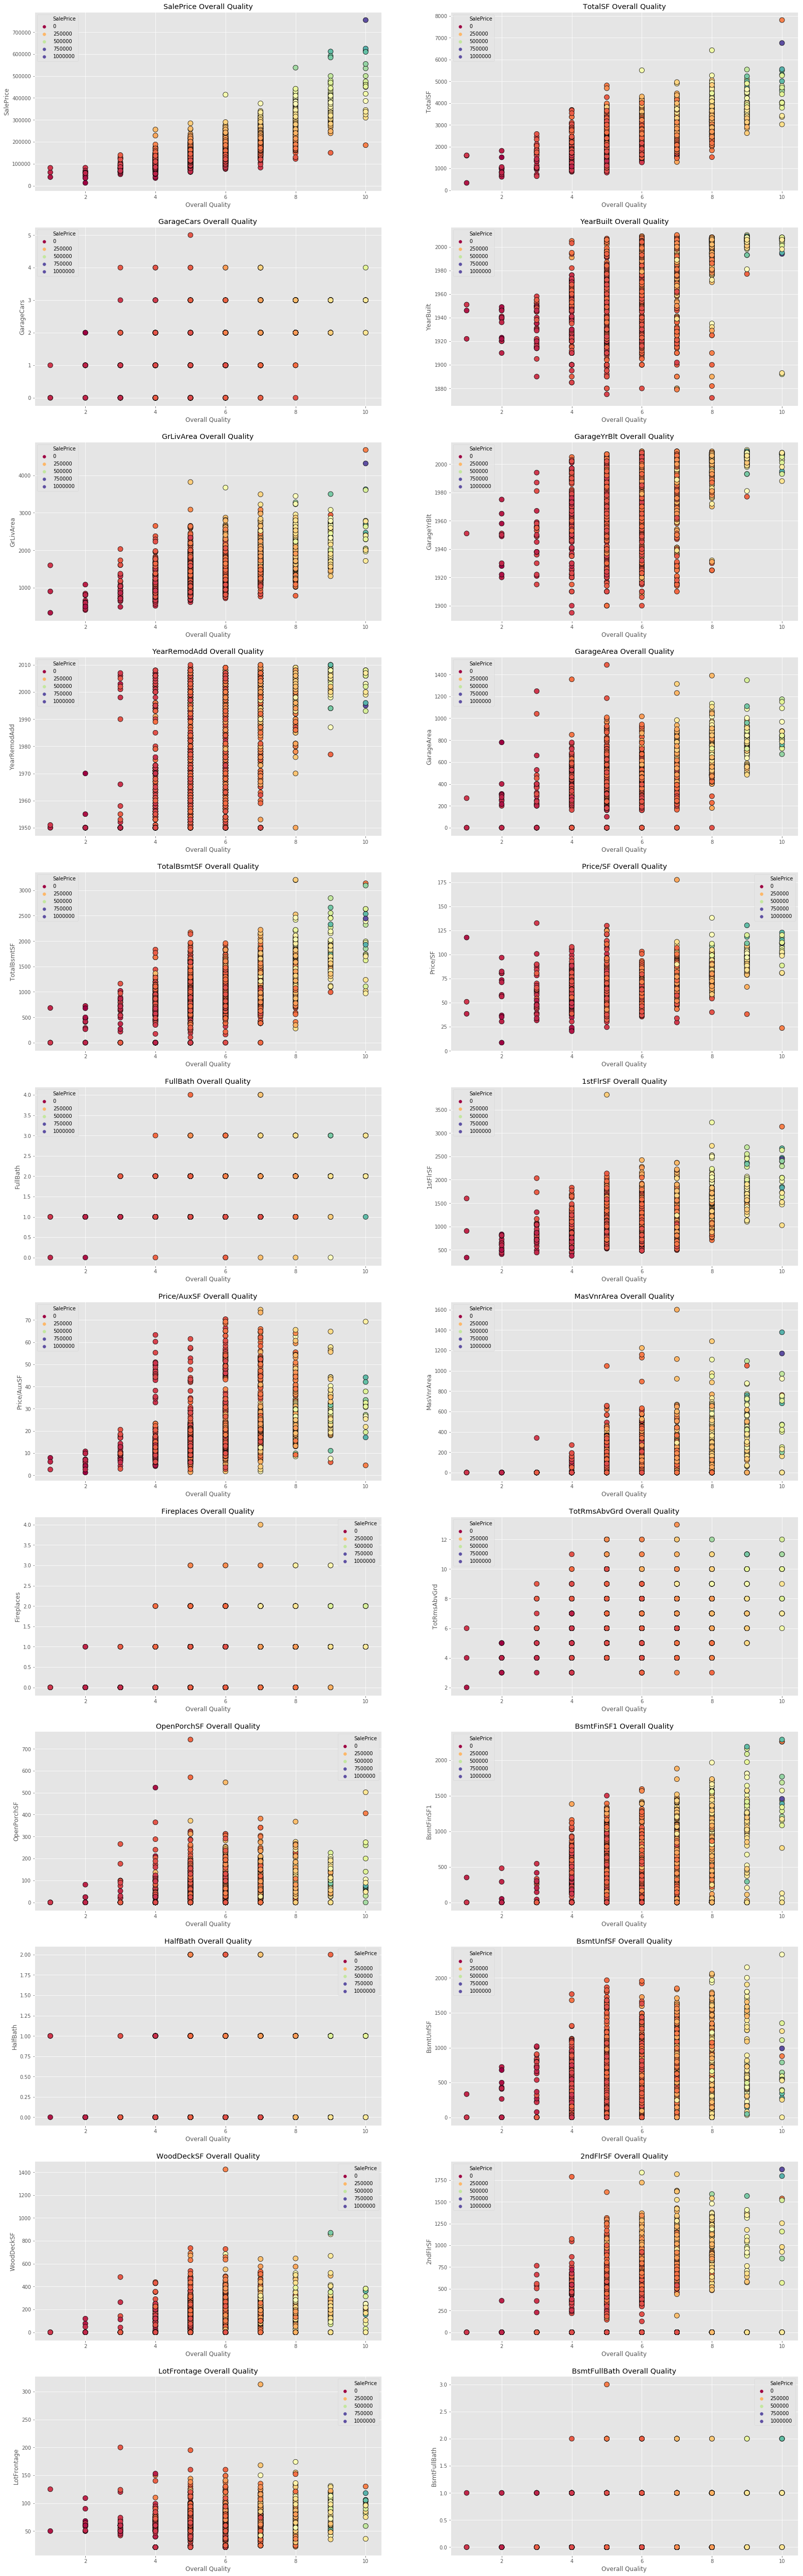

In [665]:
qual_cors = hcorr[['OverallQual']].sort_values(by = 'OverallQual', ascending = False)

fig, axs = plt.subplots(12,2, figsize=(18, 60))
plt.subplots_adjust(right=1.3, top=1.3)
axs = axs.flatten()
for i, col in enumerate(list(qual_cors.index[1:25])):
    sns.scatterplot(y=col, x='OverallQual',s=100 ,ax=axs[i],
                    hue = 'SalePrice',palette="Spectral",
                    edgecolor = 'black',data=housing)
    axs[i].set_ylabel(col)
    axs[i].set_xlabel('Overall Quality')
    axs[i].set_title(f'{col} Overall Quality')
plt.show()

# Boxplot vs. Overall Quality

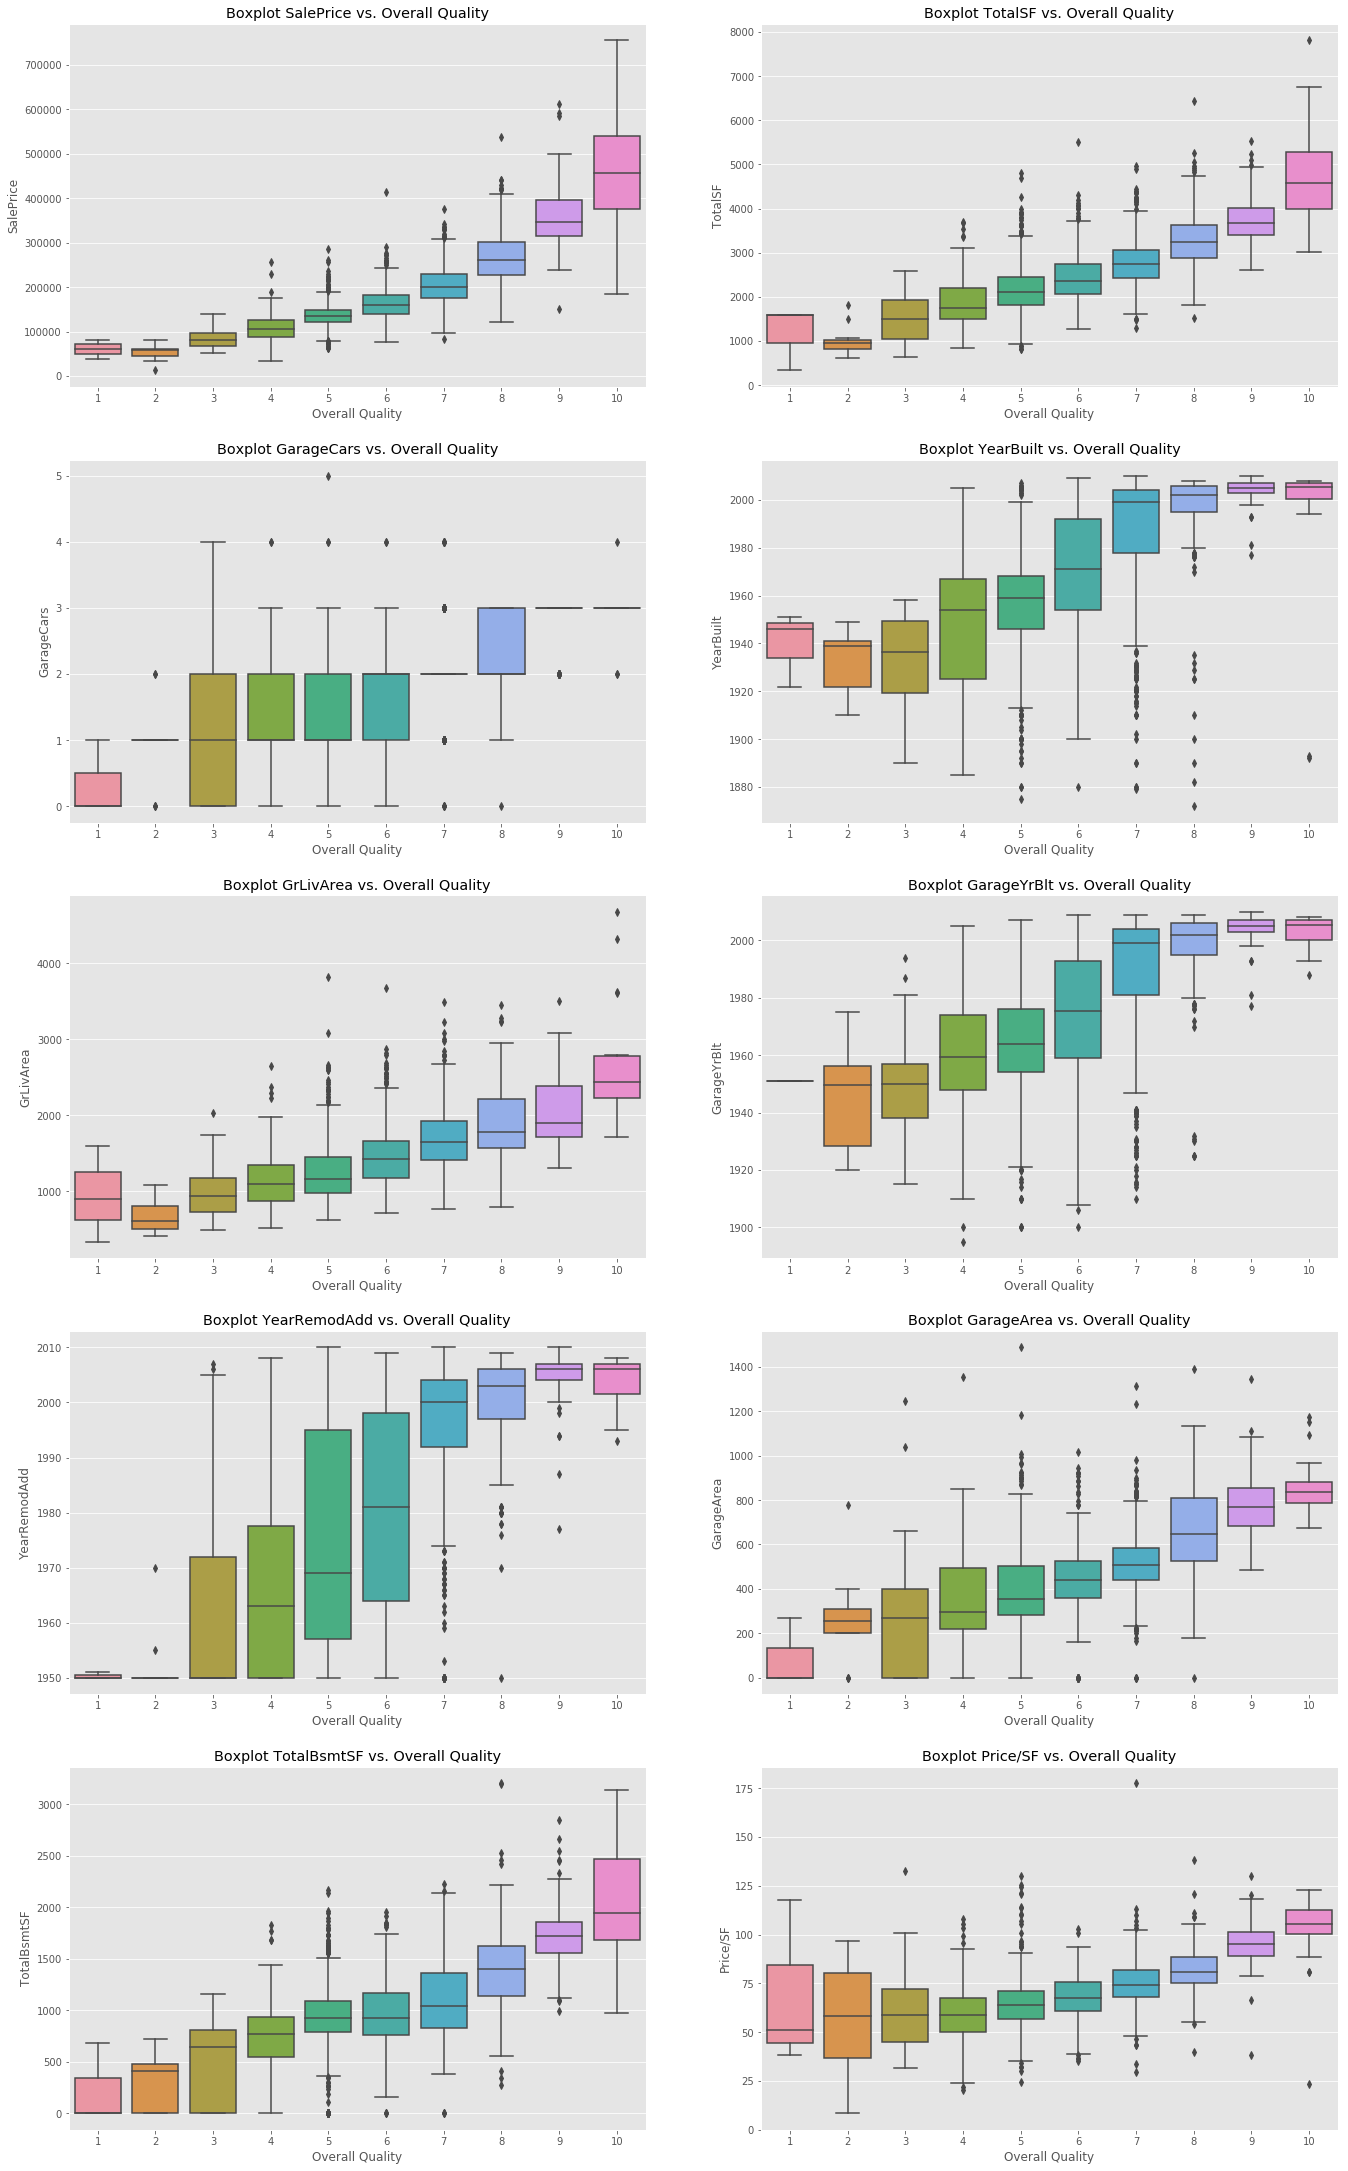

In [668]:
fig, axs = plt.subplots(int(np.ceil(len(qual_cors.index[1:10])/2)),2,figsize = (15,6))
plt.subplots_adjust(right=1.3, top=5)
axs = axs.flatten()
for i, col in enumerate(qual_cors.index[1:11]):
    sns.boxplot(x='OverallQual',y = col,ax=axs[i],data=housing)
    axs[i].set_ylabel(f'{col}')
    axs[i].set_xlabel(f'Overall Quality')
    axs[i].set_title(f'Boxplot {col} vs. Overall Quality')
plt.show()

# Linear Model w/ Naive Feature Selection Based on Correlation w/ Sale Price Alone

In [122]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

try:  # train_test_split was moved in 0.18.0
    from sklearn.model_selection import train_test_split
except:  # Following import works through 0.19 but outputs a warning in 0.18
    from sklearn.cross_validation import train_test_split

### Dealing with Null Values

In [509]:
data = housing[hsale_cors.index.to_numpy()[0:5]] #subsetting data by columns most correlated with SalePrice in Housing dataset

num_nulls = []
for i in range(0,len(data)):
    num_nulls.append([i,sum(data.iloc[i,:].isnull())])

null_counts = pd.DataFrame(num_nulls)

rows_with_a_null = null_counts.loc[null_counts[1] != 0][0].to_numpy()

rows_without_null = np.delete(np.arange(0,2580), rows_with_a_null, axis=None)

data = data.iloc[rows_without_null,0:len(data)]

### Fitting 

2579 2579
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     2252.
Date:                Wed, 25 Aug 2021   Prob (F-statistic):               0.00
Time:                        00:48:14   Log-Likelihood:                -21419.
No. Observations:                1805   AIC:                         4.285e+04
Df Residuals:                    1801   BIC:                         4.287e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.776e+05    811.969    218.67

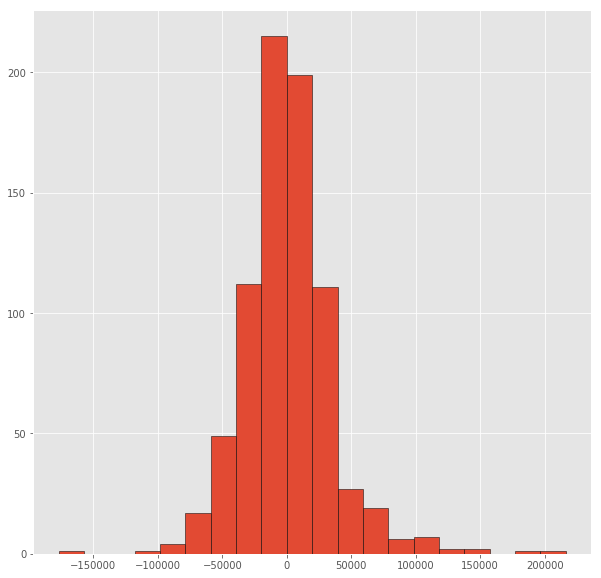

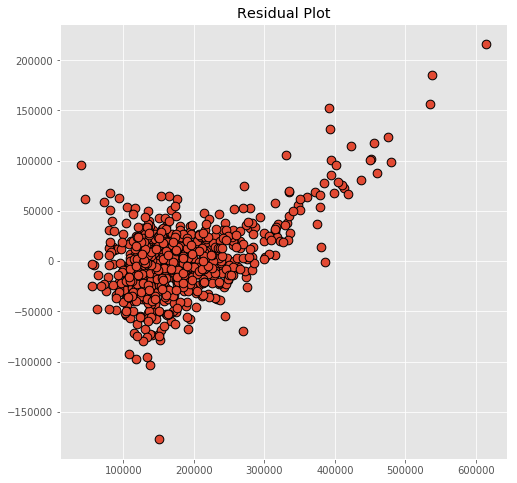

In [510]:
Y = data['SalePrice']
X = data.iloc[:,1:]
X.columns

print(len(X),len(Y))


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled =  scaler.transform(X_test)
#################################################################### statsmodels
X_add_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_add_const)
results = model.fit()
print(results.summary())

###################################################################### sklearn

lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

##################################################################### diagnostic plots

residuals = y_test - lm.predict(X_test_scaled)
residuals.hist(bins = 20,figsize = (10,10),edgecolor = 'black')

fig, ax = plt.subplots()
fig.set_size_inches(8,8)
plt.scatter(x = y_test,y = residuals,edgecolors = 'black',linewidths = 1,s = 75)
plt.title('Residual Plot')
plt.show()

Residual plot is indicating multicollinearity issues.

# Feature Selection with Lasso Regression:

### 1.) SalePrice Target

In [137]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import copy

# *Imputing Nulls*

In [162]:
data = hres.copy()
data.shape

(2603, 118)

In [163]:
nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts

MapRefNo  GrLivArea  SalePrice  MSSubClass  MSZoning  LotFrontage  LotArea  \
0         0          0          0           0         0          462        0   

   Street  Alley  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0       0   2433         0            0          0          0          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0             0           0           0         0           0            0   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0            0          0             0          0         0            0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            0          14          14          0          0           0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0        65        65            67            65           1            66   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           1          1            1        0          0           0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1         0         0             0             2             2   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0         0             0             0            0             0   

   Functional  Fireplaces  FireplaceQu  GarageType  GarageYrBlt  GarageFinish  \
0           0           0         1261         128          130           130   

   GarageCars  GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  \
0           1           1         130         130           0           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  \
0            0              0          0            0         0    2594   

   Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0   2075         2505        0       0       0         0              0   

   TotalSF  Price/SF  BsmtPercentUnfinished  LowQualFinishedPercent  \
0        1         1                     65                       1   

   TotalAuxSF  relativeAuxSF  Price/AuxSF  TtlBsmtSF  AcreGr  SaleCond  \
0           0              0            0          2       0      1936   

   AcreNt_S  Rcrd_Mo  PA-PostD  PA-StSfx  Source  LndAc_S  PA-PreD  TxD_S  \
0         0        0      2603        11       0        0     2480      0   

   SchD_S  PA-Nmbr  OthAc_S  YrBuilt  ValType  Ext1  Ext2  GLA  GarYrBlt  \
0       0        0        0        2        0     2     2    2         2   

   NmbrBRs  PA-UntNo  Cars  PA-Strt  PA-UnTyp  TtlVal_AsrYr  Rcrd_Yr  ImpAc_S  \
0        2      2537     2        0      2596             0        0        0   

   Date  Central Air  
0     0            2

**By default we'll drop features that have 1k+ null values**

Alley, FireplaceQu, PoolQC, Fence, MiscFeature, SaleCond, PA-PostD, PA-PreD, PA-UntNo

In [164]:
high_null_cols = ["Alley", "FireplaceQu", "PoolQC",
                  "Fence", "MiscFeature", "SaleCond",
                  "PA-PostD", "PA-PreD", "PA-UntNo","PA-UnTyp"] #columns with too many nulls

data = data.drop(high_null_cols,axis = 1)

In [165]:
nan_counts = pd.DataFrame(data.isnull().sum()).T
nan_counts

MapRefNo  GrLivArea  SalePrice  MSSubClass  MSZoning  LotFrontage  LotArea  \
0         0          0          0           0         0          462        0   

   Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0       0         0            0          0          0          0   

   Neighborhood  Condition1  Condition2  BldgType  HouseStyle  OverallQual  \
0             0           0           0         0           0            0   

   OverallCond  YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  \
0            0          0             0          0         0            0   

   Exterior2nd  MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  \
0            0          14          14          0          0           0   

   BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0        65        65            67            65           1            66   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0           1          1            1        0          0           0   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  \
0           1         0         0             0             2             2   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         0         0             0             0            0             0   

   Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           0           0         128          130           130           1   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0           1         130         130           0           0            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       0       0   

   SaleType  SaleCondition  TotalSF  Price/SF  BsmtPercentUnfinished  \
0         0              0        1         1                     65   

   LowQualFinishedPercent  TotalAuxSF  relativeAuxSF  Price/AuxSF  TtlBsmtSF  \
0                       1           0              0            0          2   

   AcreGr  AcreNt_S  Rcrd_Mo  PA-StSfx  Source  LndAc_S  TxD_S  SchD_S  \
0       0         0        0        11       0        0      0       0   

   PA-Nmbr  OthAc_S  YrBuilt  ValType  Ext1  Ext2  GLA  GarYrBlt  NmbrBRs  \
0        0        0        2        0     2     2    2         2        2   

   Cars  PA-Strt  TtlVal_AsrYr  Rcrd_Yr  ImpAc_S  Date  Central Air  
0     2        0             0        0        0     0            2

In [469]:
rem_null_cols = [] # remaining columns that could take on a null value and might be able to be imputed

**Now we see if the remaining variables that can potentially take on a null can be meaningfully imputed** 

In [468]:
cat_house = ghd().loc[housing_dict['Variable Type'] != 'Numerical']
for i in range(0,len(cat_house)):
    print(cat_house.iloc[i,0],"\n",cat_house.iloc[i,2],"\n")

Alley 
 ['Grvl   Gravel', 'Pave   Paved', 'NA     No alley access'] 

BldgType 
 ['1Fam   Single-family Detached', '2FmCon Two-family Conversion; originally built as one-family dwelling', 'Duplx  Duplex', 'TwnhsE Townhouse End Unit', 'TwnhsI Townhouse Inside Unit'] 

BsmtCond 
 ['Ex     Excellent', 'Gd     Good', 'TA     Typical - slight dampness allowed', 'Fa     Fair - dampness or some cracking or settling', 'Po     Poor - Severe cracking, settling, or wetness', 'NA     No Basement'] 

BsmtExposure 
 ['Gd     Good Exposure', 'Av     Average Exposure (split levels or foyers typically score average or above)', 'Mn     Mimimum Exposure', 'No     No Exposure', 'NA     No Basement'] 

BsmtFinType1 
 ['GLQ    Good Living Quarters', 'ALQ    Average Living Quarters', 'BLQ    Below Average Living Quarters', 'Rec    Average Rec Room', 'LwQ    Low Quality', 'Unf    Unfinshed', 'NA     No Basement'] 

BsmtFinType2 
 ['GLQ    Good Living Quarters', 'ALQ    Average Living Quarters', 'BLQ    Below 

In [136]:
# lasso = Lasso()

# alpha_range = np.linspace(0.1,20.1,20)
# lasso.set_params(normalize=False)
# coefs_lasso  = []

# for alpha in alpha_range:
#         lasso.set_params(alpha=alpha)
#         lasso.fit(, )  
#         coefs_lasso.append(lasso.coef_)

# coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas_range, columns = .columns)  
# coefs_lasso.head()

In [ ]:
# for name in coefs_lasso.columns:
#     plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')
# plt.legend(loc=1) 